## Quantum jumps in time dependent systems

In [1]:
import matplotlib.pyplot as plt
import diracpy as dp
import numpy as np

Since `quantum_dyanmics.quantumjumps` inherits from `quantum_dynamics.schrodint` it also supports time depended systems (`quantum_systems.qsys_t`) where the Hamiltonian varies in time.

In [3]:
def f(t):
    return np.sin(np.pi * t)**2

In [4]:
atom = dp.two_level_subspace(index=0)
cav = dp.fock_subspace(index=1)

Delta, Omega, gamma = 0, 10, 0.1

H_0 = Delta * atom.sigma_z
V = 0.5 * Omega * (cav.a * atom.sigma_plus + cav.adag * atom.sigma_minus)

psi0 = dp.ket(['e',0])
jumpop = np.sqrt(gamma) * cav.a
system = dp.qsys_t(H_0, [V], [f], initialstates=[psi0], n_int=2, jump_ops=[jumpop])

In [7]:
times = np.linspace(0,1,200)
jpsolve = dp.quantumjumps(psi0, times, system)

In [8]:
# Evaluate the deterministic evolution between quantum jumps
jpsolve.gen_bstate_evolution()

In [9]:
# Evaluate Lindblad master equation for comparison
lbsolve = dp.lindbladint(psi0*psi0.conj(), times, system)
lbsolve.solve()

In [10]:
# number of quantum trajectories
n = int(1e3)
# Monte Carlo simulation
mean_rho, var_rho = jpsolve.calc_rho(n)

In [11]:
system.print_basis()

1  *  ket ('e', 0)
1  *  ket ('g', 1)
1  *  ket ('g', 0)


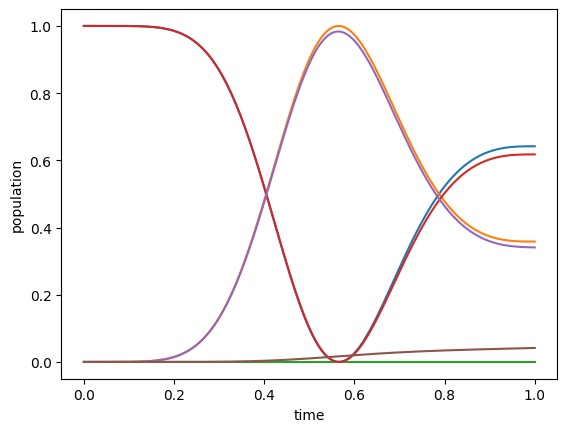

In [12]:
fig, ax = plt.subplots(1,1)
ax.plot(times, np.real(mean_rho[:,0,0]))
ax.plot(times, np.real(mean_rho[:,1,1]))
ax.plot(times, np.real(mean_rho[:,2,2]))
for i in range(system.dim):
    ax.plot(times, np.real(lbsolve.soln[:,i,i]))
ax.set_xlabel('time')
ax.set_ylabel('population')
plt.show()